In [34]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fetching the data using API Key

In [11]:
api_key = 'B74YQ2WTFER6J3TI'  # Alpha Vantage API key
symbol = 'AAPL'  #symbol which stock to fetch
interval = '5min'  # Interval for intraday data
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}'

# making the request and giving the output in json format
response = requests.get(url)
data = response.json()

# Check if the data was retrieved successfully or not
if 'Time Series (5min)' in data:
    # Extract the time series data
    time_series = data['Time Series (5min)']

    # Convert the data into DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df = df.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'})

    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)

    # Sort the DataFrame by date/time
    df = df.sort_index()
    # Display the DataFrame
    print(df)
else:
    print("Error: Data not found or invalid response from the API.")

                         Open      High       Low     Close  Volume
2024-12-23 11:40:00  254.5600  254.9800  254.5470  254.8060  185098
2024-12-23 11:45:00  254.8200  255.1353  254.7500  254.9408  219298
2024-12-23 11:50:00  254.9400  255.2300  254.8600  254.9500  169245
2024-12-23 11:55:00  254.9600  254.9999  254.8000  254.9050  149872
2024-12-23 12:00:00  254.9000  255.1500  254.8800  254.9200  194360
...                       ...       ...       ...       ...     ...
2024-12-23 19:35:00  254.7000  254.8100  254.6400  254.7000     482
2024-12-23 19:40:00  254.7000  254.8100  254.6400  254.7300     355
2024-12-23 19:45:00  254.7300  254.9500  254.6590  254.9301    2679
2024-12-23 19:50:00  254.9400  254.9500  254.8100  254.8808    2783
2024-12-23 19:55:00  254.9500  254.9500  254.8100  254.9500    1363

[100 rows x 5 columns]


# Data Analysis

In [19]:
# Check data types
print(df.dtypes)

# Check unique values in the columns to identify any non-numeric data
print(df.nunique())

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object
Open      80
High      72
Low       71
Close     85
Volume    99
dtype: int64


In [17]:
# Check for missing values
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [18]:
# Display basic statistics of the dataset
print(df.describe())

            Open      High       Low     Close Volume
count        100       100       100       100    100
unique        80        72        71        85     99
top     255.2700  255.1500  255.0100  255.0300    560
freq           3         7         5         3      2


In [20]:
# Convert the columns to numeric, coercing errors
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


print(df.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [21]:
# Check for duplicate rows
print(df.duplicated().sum())

0


**Visualization.**

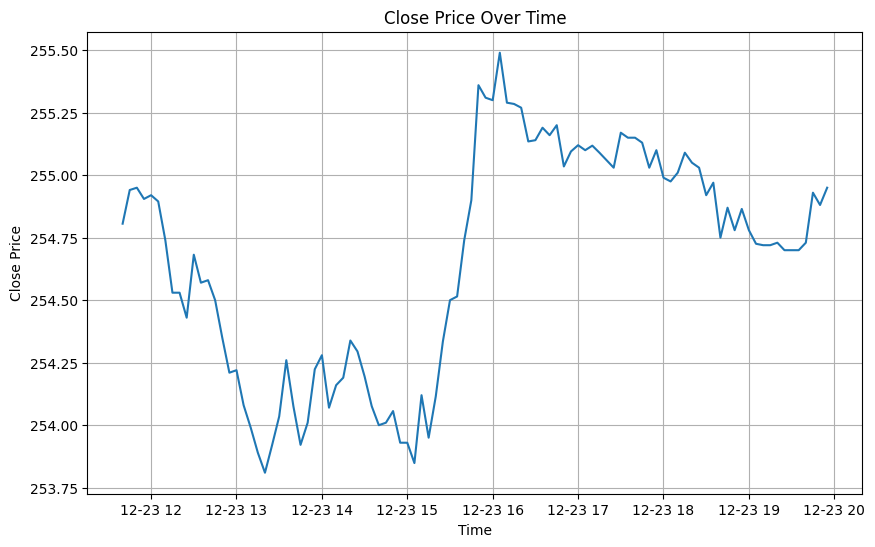

In [22]:
# Plot Close price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [23]:
# Check correlation between the numeric columns
print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.497882  0.210148  0.961625  0.136417
High    0.497882  1.000000  0.117341  0.510751  0.053932
Low     0.210148  0.117341  1.000000  0.198113  0.056688
Close   0.961625  0.510751  0.198113  1.000000  0.142180
Volume  0.136417  0.053932  0.056688  0.142180  1.000000


## 1. Visualization Showing Pattern Correlation

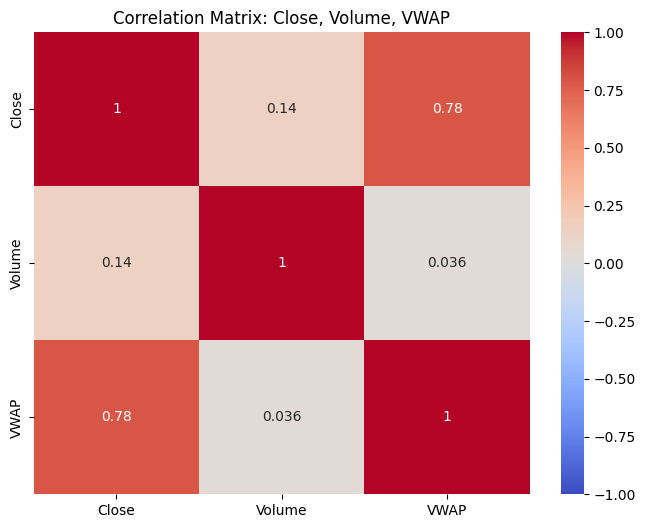

In [35]:
# Calculate correlation matrix between Close, Volume, and VWAP
correlation_matrix = df[['Close', 'Volume', 'VWAP']].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Close, Volume, VWAP')
plt.show()


## 2. Calculate Key Statistical Measures (Standard Deviation, Skewness)

In [36]:
# Calculate Standard Deviation and Skewness
std_close = df['Close'].std()
std_volume = df['Volume'].std()
std_vwap = df['VWAP'].std()

skew_close = df['Close'].skew()
skew_volume = df['Volume'].skew()
skew_vwap = df['VWAP'].skew()

# Displaying the results
print(f"Standard Deviation of Close: {std_close}")
print(f"Standard Deviation of Volume: {std_volume}")
print(f"Standard Deviation of VWAP: {std_vwap}")

print(f"Skewness of Close: {skew_close}")
print(f"Skewness of Volume: {skew_volume}")
print(f"Skewness of VWAP: {skew_vwap}")

Standard Deviation of Close: 0.4516240260583263
Standard Deviation of Volume: 1701770.1788931342
Standard Deviation of VWAP: 0.25200190145285245
Skewness of Close: -0.3296169426560136
Skewness of Volume: 9.494503039521561
Skewness of VWAP: -0.5706557800211041


# Calculating and visualizing

Volatility = Measures how much the price fluctuates over a 20-period window.

In [24]:
# Calculate returns (percentage change in Close prices)
df['Return'] = df['Close'].pct_change()

# Define rolling window size (e.g., 20 periods)
window_size = 20

# Calculate rolling volatility (standard deviation of returns)
df['Rolling_Volatility'] = df['Return'].rolling(window=window_size).std() * (252**0.5)  # Annualized volatility

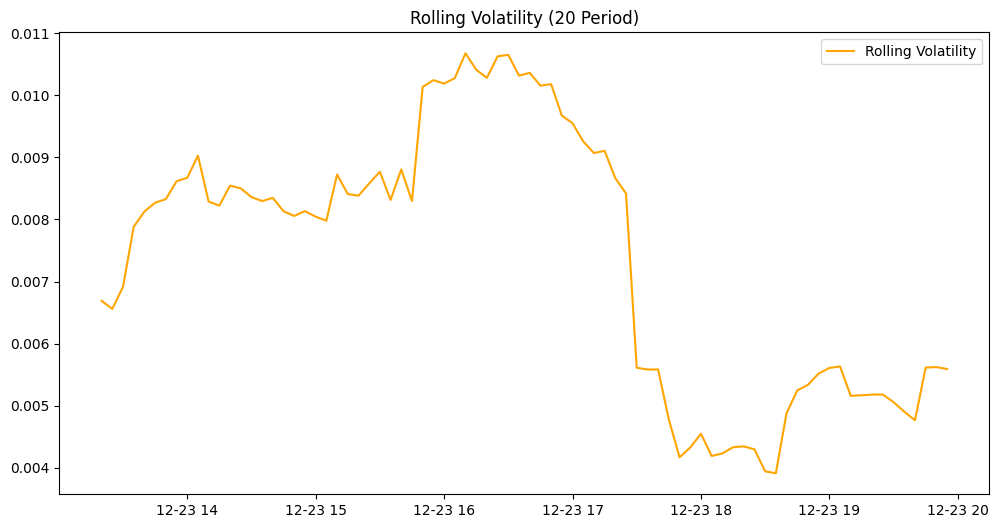

In [29]:
# Plot Rolling Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Volatility'], label='Rolling Volatility', color='orange')
plt.title('Rolling Volatility (20 Period)')
plt.legend()
plt.show()

 VWAP = Displays the average price weighted by volume, helping identify the price trend relative to trading volume.

In [25]:
# Calculate VWAP (using typical price: (High + Low + Close) / 3)
df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

# VWAP = Cumulative sum of (Typical Price * Volume) / Cumulative sum of Volume
df['VWAP'] = (df['Typical_Price'] * df['Volume']).cumsum() / df['Volume'].cumsum()

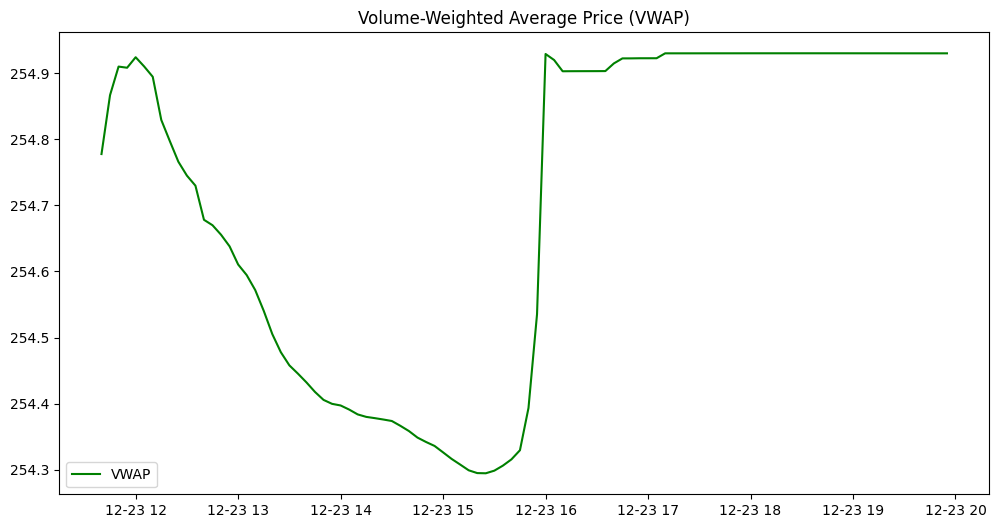

In [30]:
# Plot VWAP
plt.figure(figsize=(12, 6))
plt.plot(df['VWAP'], label='VWAP', color='green')
plt.title('Volume-Weighted Average Price (VWAP)')
plt.legend()
plt.show()

Helps smooth out price data to show trends over 20 and 50 periods.

In [26]:
# Calculate 20-period and 50-period moving averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

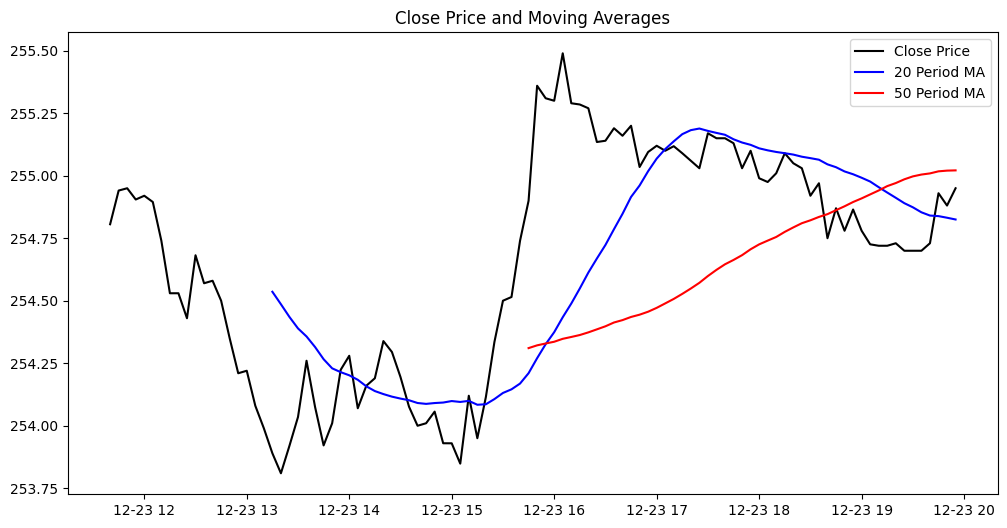

In [31]:
# Plot Close Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['MA_20'], label='20 Period MA', color='blue')
plt.plot(df['MA_50'], label='50 Period MA', color='red')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()

 Identifies unusual trading patterns by looking for price movements that are far from the norm (price anomalies) and significant volume spikes (volume anomalies).

In [27]:
# Calculate z-scores for price movements
df['Price_Change_Zscore'] = (df['Return'] - df['Return'].mean()) / df['Return'].std()

# Identify price anomalies (e.g., z-score > 3)
df['Price_Anomaly'] = df['Price_Change_Zscore'].apply(lambda x: x > 3)

In [28]:
# Calculate rolling average of volume
df['Rolling_Volume_Avg'] = df['Volume'].rolling(window=20).mean()

# Identify volume anomalies (e.g., volume > 3 times the rolling average)
df['Volume_Anomaly'] = df['Volume'] > 3 * df['Rolling_Volume_Avg']


### 3. Identify and Investigate One Interesting Pattern

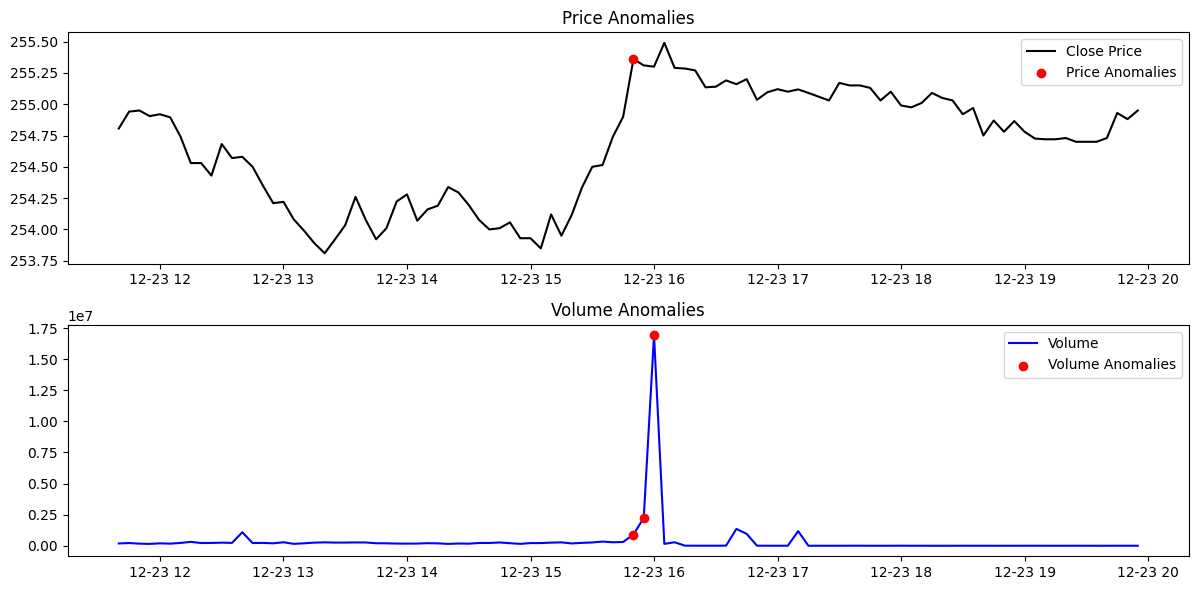

In [32]:
# Plot anomalies (Price and Volume)
plt.figure(figsize=(12, 6))

# Price Anomalies
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price', color='black')
plt.scatter(df.index[df['Price_Anomaly']], df['Close'][df['Price_Anomaly']], color='red', label='Price Anomalies', zorder=5)
plt.title('Price Anomalies')
plt.legend()

# Volume Anomalies
plt.subplot(2, 1, 2)
plt.plot(df['Volume'], label='Volume', color='blue')
plt.scatter(df.index[df['Volume_Anomaly']], df['Volume'][df['Volume_Anomaly']], color='red', label='Volume Anomalies', zorder=5)
plt.title('Volume Anomalies')
plt.legend()

plt.tight_layout()
plt.show()
